In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import os
import matplotlib.pyplot as plt

In [3]:
# Load the dataset
train = pd.read_csv('playground-series-data/train.csv')
test = pd.read_csv('playground-series-data/test.csv')
accidentid = train['id']

In [4]:
train.head()

,id,road_type,num_lanes,curvature,speed_limit,lighting,weather,road_signs_present,public_road,time_of_day,holiday,school_season,num_reported_accidents,accident_risk
0,0,urban,2,0.06,35,daylight,rainy,False,True,afternoon,False,True,1,0.13
1,1,urban,4,0.99,35,daylight,clear,True,False,evening,True,True,0,0.35
2,2,rural,4,0.63,70,dim,clear,False,True,morning,True,False,2,0.30
3,3,highway,4,0.07,35,dim,rainy,True,True,morning,False,False,1,0.21
4,4,rural,1,0.58,60,daylight,foggy,False,False,evening,True,False,1,0.56


### Categorical Features
* `road_type`
* `lighting`
* `weather`
* `time_of_day`

In [ ]:
def encode_categorical_features(train, test):
    """
    # One-hot encode categorical features

    Parameters:
    train (pd.DataFrame): Training dataset
    test (pd.DataFrame): Testing dataset
    """
    categorical_features = ['road_type', 'lighting', 'time_of_day', 'weather', 'road_signs_present']
    
    # One-hot encode the categorical features in both train and test datasets
    train_encoded = pd.get_dummies(train, columns=categorical_features, drop_first=True)
    test_encoded = pd.get_dummies(test, columns=categorical_features, drop_first=True)
    
    # Align the train and test datasets to ensure they have the same columns
    train_encoded, test_encoded = train_encoded.align(test_encoded, join='left', axis=1, fill_value=0)
    
    return train_encoded, test_encoded

train_encoded, test_encoded = encode_categorical_features(train, test)

,id,num_lanes,curvature,speed_limit,public_road,holiday,school_season,num_reported_accidents,accident_risk,road_type_rural,road_type_urban,lighting_dim,lighting_night,time_of_day_evening,time_of_day_morning,weather_foggy,weather_rainy,road_signs_present_True
0,517754,2,0.34,45,True,True,True,1,0,False,False,False,True,False,False,False,False,True
1,517755,3,0.04,45,False,True,False,0,0,False,True,True,False,False,False,True,False,True
2,517756,2,0.59,35,False,True,True,1,0,False,True,True,False,False,False,False,False,True
3,517757,4,0.95,35,False,False,False,2,0,True,False,False,False,False,False,False,True,False
4,517758,2,0.86,35,False,False,True,3,0,False,False,False,False,True,False,False,False,True


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517754 entries, 0 to 517753
Data columns (total 14 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   id                      517754 non-null  int64  
 1   road_type               517754 non-null  object 
 2   num_lanes               517754 non-null  int64  
 3   curvature               517754 non-null  float64
 4   speed_limit             517754 non-null  int64  
 5   lighting                517754 non-null  object 
 6   weather                 517754 non-null  object 
 7   road_signs_present      517754 non-null  bool   
 8   public_road             517754 non-null  bool   
 9   time_of_day             517754 non-null  object 
 10  holiday                 517754 non-null  bool   
 11  school_season           517754 non-null  bool   
 12  num_reported_accidents  517754 non-null  int64  
 13  accident_risk           517754 non-null  float64
dtypes: bool(4), float64(

<Axes: >

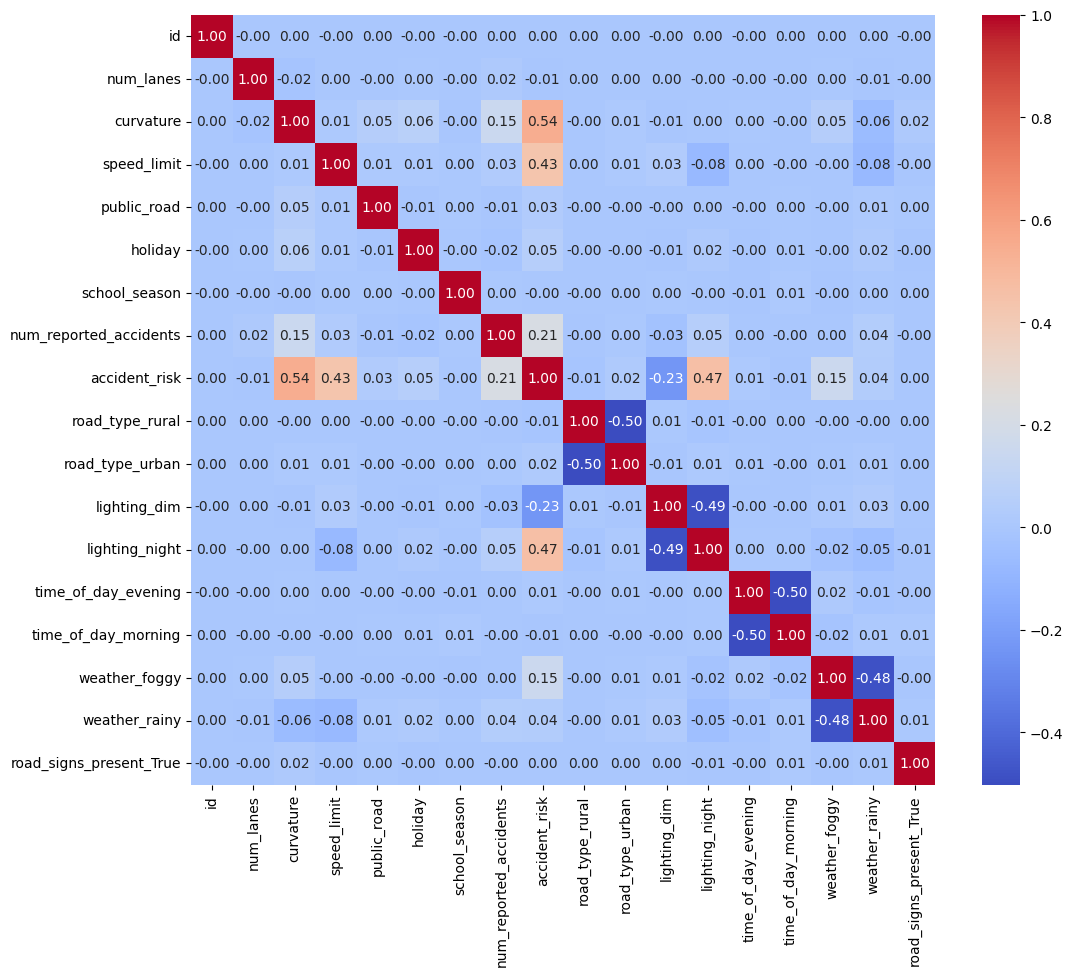

In [11]:
train.info()
correlation_matrix = train_encoded.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')

**Feature Engineering**

In [12]:
def road_capacity(train_encoded, test_encoded):
    """
    # Create a new feature based on `speed_limit` and `speed_limit`

    Parameters:
    train_encoded (pd.DataFrame): One-hot encoded training dataset
    test_encoded (pd.DataFrame): One-hot encoded testing dataset
    """

    # Create a new feature 'road_capacity' as the product of 'speed_limit' and 'num_lanes'
    train_encoded['road_capacity'] = train_encoded['speed_limit'] * train_encoded['num_lanes']
    test_encoded['road_capacity'] = test_encoded['speed_limit'] * test_encoded['num_lanes']
    
    return train_encoded, test_encoded

train_encoded, test_encoded = road_capacity(train_encoded, test_encoded)

In [13]:
train_encoded.head()

,id,num_lanes,curvature,speed_limit,public_road,holiday,school_season,num_reported_accidents,accident_risk,road_type_rural,road_type_urban,lighting_dim,lighting_night,time_of_day_evening,time_of_day_morning,weather_foggy,weather_rainy,road_signs_present_True,road_capacity
0,0,2,0.06,35,True,False,True,1,0.13,False,True,False,False,False,False,False,True,False,70
1,1,4,0.99,35,False,True,True,0,0.35,False,True,False,False,True,False,False,False,True,140
2,2,4,0.63,70,True,True,False,2,0.30,True,False,True,False,False,True,False,False,False,280
3,3,4,0.07,35,True,False,False,1,0.21,False,False,True,False,False,True,False,True,True,140
4,4,1,0.58,60,False,True,False,1,0.56,True,False,False,False,True,False,True,False,False,60


In [14]:
# export encoded data for modeling
train_encoded.to_csv('encoded_data/train_encoded.csv', index=False)
test_encoded.to_csv('encoded_data/test_encoded.csv', index=False)